<a href="https://colab.research.google.com/github/jimaguere/ModeloElectoral/blob/master/Cuaderno_Taller_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instalación Librerías**

In [ ]:
#https://github.com/huggingface/transformers
!pip install -q transformers #Transformers proporciona miles de modelos previamente entrenados para realizar tareas en textos como clasificación, extracción de información, respuesta a preguntas etc


     |████████████████████████████████| 1.3MB 2.7MB/s 
     |████████████████████████████████| 1.1MB 7.8MB/s 
     |████████████████████████████████| 2.9MB 18.5MB/s 
     |████████████████████████████████| 890kB 45.1MB/s 


In [ ]:
from transformers import *

**Importar modelo preguntas y respuestas**

In [ ]:
nlp = pipeline(
    'question-answering', 
    model='mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es',
    tokenizer=(
        'mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es',  
        {"use_fast": False}
    )
)

**Establecer contexto y hacer preguntas**

In [ ]:
context = 'Mateo Guerrero  está trabajando en la universidad de Nariño en la materia electiva de base de datos'


nlp(
    {
        'question': '¿Quién está trabajando  en universidad de Nariño?',
        'context': context
    }
)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1374: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,


{'answer': 'Mateo Guerrero',
 'end': 15,
 'score': 0.9773265719413757,
 'start': 0}

In [ ]:
nlp(
    {
        'question': '¿para que materia?',
        'context': context
    }
)

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1374: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,


{'answer': 'base de datos',
 'end': 98,
 'score': 0.5491135120391846,
 'start': 86}

**importar modelo análisis de sentimientos**

In [ ]:
nlp = pipeline(
    'sentiment-analysis', 
    model='mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es',
    tokenizer=(
        'mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es',  
        {"use_fast": False}
    )
)

Some weights of the model checkpoint at mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es were not used when initializing BertForSequenceClassification: ['qa_outputs.weight', 'qa_outputs.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at mrm8488/distill-bert-base-spanish-wwm-cased-finetuned-spa-squad2-es and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to b

In [ ]:
print(nlp('estoy feliz de estar aquí en este taller, gracias por su participación'))
print(nlp('tuve un accidente en mi moto'))
print(nlp('tuve un accidente en mi moto pero estoy bien'))

[{'label': 'LABEL_1', 'score': 0.5265479683876038}]
[{'label': 'LABEL_0', 'score': 0.5189942121505737}]
[{'label': 'LABEL_1', 'score': 0.5604183077812195}]


**Wor2vec**

Una aplicación importante del aprendizaje automático en el análisis de texto, el algoritmo Word2Vec es una herramienta fascinante y muy útil. Como sugiere el nombre, crea una representación vectorial de palabras basada en el corpus que estamos usando. 

Pero la magia de Word2Vec está en cómo logra capturar la representación semántica de palabras en un vector [Mikolov 2013].



Instalar librerias 

In [ ]:
!pip install ftfy
!spacy download es_core_news_sm
#reiniciar entorno 

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


Importar Word2Vec con Gensim

In [ ]:
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser
from time import time  # To time our operations
import multiprocessing
from ftfy import fix_encoding
import spacy
import re 

Conectar a drive para leer el texto

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nlp = spacy.load('es_core_news_sm')
ruta_archivo="/content/drive/My Drive/NLP TALLER/tary.txt"
f = open (ruta_archivo,'r',encoding="utf8")
texto = f.read()
f.close()
texto = re.sub('[ \t\n]+', ' ', texto) 
texto=fix_encoding(texto)
texto

'En este trabajo se presenta el análisis, diseño e implementación de TariyKDD,una herramienta genérica para el Descubrimiento de conocimiento en bases de datos, débilmente acoplada con el SGBD PostgreSQL. TariyKDD comprende cuatro módulos que cubren la conexión, a archivos planos y bases de datos relacionales, un módulo de utilidades con clases y librerías comunes, un módulo kernel que reune las etapas de preprocesamiento, minería y visualización, y el módulo de interfaz gráfica de usuario. Dentro del kernel de minería se implementan 5 algoritmos, Apriori, FPGrowth y EquipAsso para asociación y C4.5 y Mate para clasificación. Se evalúa el rendimiento de los algoritmos EquipAsso, un algoritmo para el cálculo de conjuntos de ítems frecuentes, y Mate, un algoritmo para la construcción de arboles de clasificación, basados en nuevos operadores del álgebra relacional, con respecto a los algoritmos Apriori y FP-Growth y C4.5, respectivamente. 1. INTRODUCCION El proceso de extraer conocimiento

Crear Función para tokenizar el texto

In [ ]:
def tokenize(text):
  doc1 = nlp(text)
  words=[]
  for t in doc1:
    if  t.is_punct or  t.is_stop or t.is_space or len(str(t))<=3:
      continue
    if t.ent_type==0:
      words.append(str(t.lemma_).lower())
    else:
     
      words.append(str(t).lower())
      

  return words

tokenize("desarrollo de un sistema de información que administre los datos de bienestar familiar")

['desarrollar',
 'sistema',
 'información',
 'administrar',
 'dato',
 'bienestar',
 'familiar']

Entrenamiento del modelo Word2vec

In [ ]:
def entrenamiento(texto):
        doc=nlp(fix_encoding(texto))
        sent=[]
        #Recorrer oraciones del texto
        for num,oracion in enumerate(doc.sents):
            o=tokenize(str(oracion)) #tokenizar oración  
            sent.append(o) 
        print(sent)
        #Crea las frases relevantes de la lista de oraciones:
        phrases = Phrases(sent, min_count=30, progress_per=10000)
        #Transforme el corpus en función de las bigramas detectadas:
        bigram = Phraser(phrases)
        sentences = bigram[sent]
                  
        #Entrenamiento del modelo
        cores = multiprocessing.cpu_count() #cuenta el nro de nucles de la pc

        w2v_model = Word2Vec(min_count=3,
                     window=10,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores
                    )
        t = time()
        w2v_model.build_vocab(sentences,progress_per=10000)  # preparar el vocabulario modelo
        print('Tiempo para desarrollar vocabulario: {} minutos'.format(round((time() - t) / 60, 2)))
        t = time()
        w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=10000, report_delay=1) #entrenar
        print('Tiempo de entrenamiento del modelo: {} minutos'.format(round((time() - t) / 60, 2)))
        return w2v_model
        
modelo=entrenamiento(texto)

[['presentar', 'análisis', 'diseñar', 'implementación', 'tariykdd', 'herramienta', 'genérico', 'descubrimiento', 'conocimiento', 'base', 'dato', 'débilmente', 'acoplar', 'sgbd', 'postgresql'], ['tariykdd', 'comprender', 'módulo', 'cubrir', 'conexión', 'archivo', 'plano', 'base', 'dato', 'relacional', 'módulo', 'utilidad', 'clase', 'librería', 'común', 'módulo', 'kernel', 'reune', 'etapa', 'preprocesamiento', 'minería', 'visualización', 'módulo', 'interfaz', 'gráfico', 'usuario'], ['kernel', 'minería', 'implementar', 'algoritmo', 'apriori', 'fpgrowth', 'equipasso', 'asociación', 'c4.5', 'mate', 'clasificación'], ['evaluar', 'rendimiento', 'algoritmo', 'equipasso', 'algoritmo', 'cálculo', 'conjunto', 'ítem', 'frecuente', 'mate', 'algoritmo', 'construcción', 'arbolar', 'clasificación', 'basar', 'operador', 'álgebra', 'relacional', 'algoritmo', 'apriori', 'growth', 'c4.5', 'respectivamente'], [], ['introduccion', 'procesar', 'extraer', 'conocimiento', 'volumen', 'dato', 'reconocer', 'inves

Explorar modelo 

In [ ]:
modelo.wv.most_similar(positive=['algoritmo'.lower()],topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('equipasso', 0.9229297041893005),
 ('mate', 0.8836698532104492),
 ('clasificación', 0.8682106137275696),
 ('apriori', 0.8527795076370239),
 ('c4.5', 0.8527745008468628),
 ('fpgrowth', 0.8195726871490479),
 ('conjunto', 0.7727140188217163),
 ('asociación', 0.7705538272857666),
 ('implementar', 0.7433198690414429),
 ('rendimiento', 0.7270721197128296)]

Graficando el espacio vectorial en sus componentes principales

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


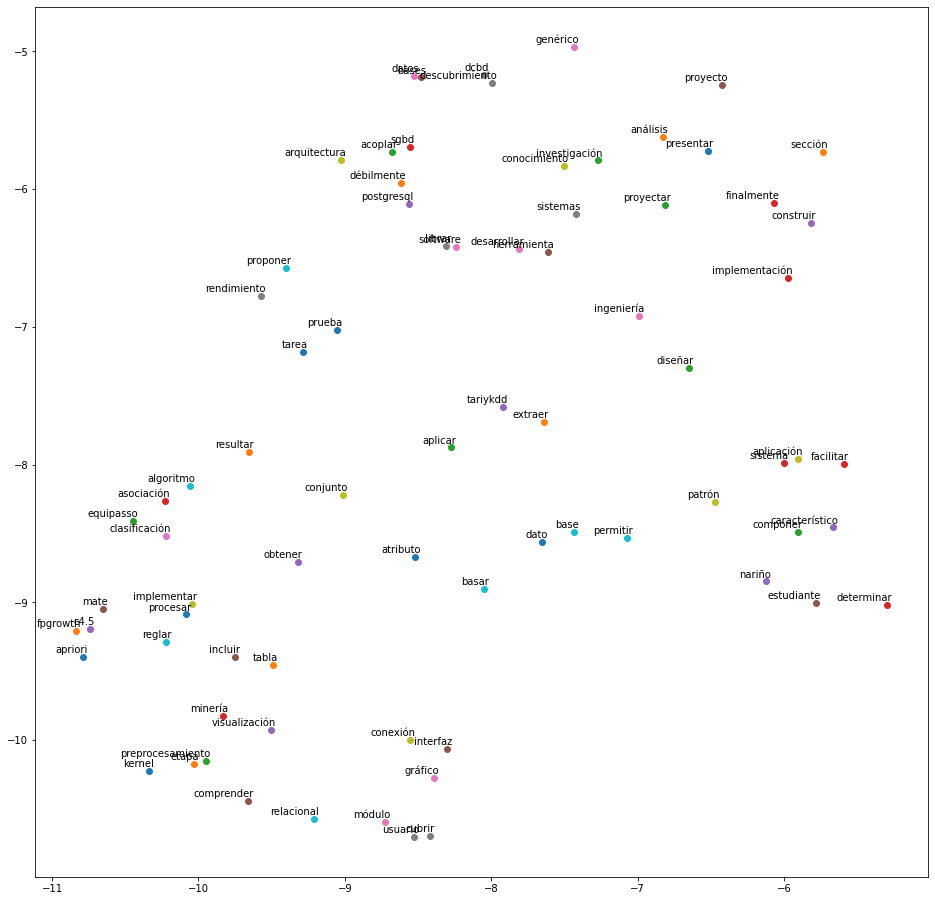

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(modelo)

**Doc2Vec**


Sobre la base de Word2Vec, los investigadores también han implementado una representación vectorial de documentos o párrafos, popularmente llamado Doc2Vec. Esto significa que ahora podemos usar el poder de la comprensión semántica de Word2Vec para describir documentos también, y en cualquier dimensión en la que nos gustaría entrenarlo!

Construir nuestro modelo propio de análisis de sentimientos 

Importar librerías 

In [ ]:
!pip install faiss-gpu

     |████████████████████████████████| 67.6MB 72kB/s 


In [146]:
import pandas as pd
import gensim
import torch
import matplotlib.pyplot as plt
import string
import nltk
from nltk.stem import SnowballStemmer
from gensim.models.doc2vec import Doc2Vec
import faiss
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Leer el conjunto de tweets

In [147]:
df=pd.read_csv("/content/drive/My Drive/NLP TALLER/tweet_sentimientos.csv",sep="|",index_col=0)
df.head()

,tweet,clase
0,abcdesevilla.es: Recio no tiene «indicios pote...,0
1,abcdesevilla.es: Cuatro altos cargos de Empleo...,0
2,La marcha atrás del PP en posponer devolución ...,0
3,Accidente en BUS-VAO A-6 km. 12. Motorista de ...,0
4,"#FF a ti, que deseas desesperadamente hacerme ...",0


Explorar datos

0    7808
1    5393
Name: clase, dtype: int64


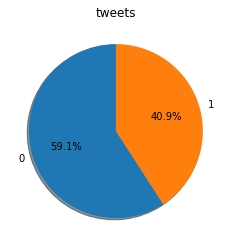

In [148]:
print(df['clase'].value_counts())
plt.pie(df['clase'].value_counts(), labels=df['clase'].value_counts().index,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('tweets')
plt.show()

Procesamiento y limpiez de los textos

In [149]:
#Función Convertir el texto en minúsculas, eliminar el texto entre corchetes, eliminar la puntuación y eliminar las palabras que contienen números '' '.
def texto_limpio(t):
  t=str(t)
  t=t.lower()
  t=re.sub('\[.*?¿\]\%', ' ', t)
  t=re.sub('[%s]' % re.escape(string.punctuation), ' ', t)
  t=re.sub('\w*\d\w*', '', t)
  t=re.sub('[‘’“”…«»]', '', t)
  t=re.sub('\n', ' ', t)
  return t

round = lambda x: texto_limpio(x)

df['tweet_limpio'] = df.tweet.apply(round)
df.head(5)

,tweet,clase,tweet_limpio
0,abcdesevilla.es: Recio no tiene «indicios pote...,0,abcdesevilla es recio no tiene indicios poten...
1,abcdesevilla.es: Cuatro altos cargos de Empleo...,0,abcdesevilla es cuatro altos cargos de empleo...
2,La marcha atrás del PP en posponer devolución ...,0,la marcha atrás del pp en posponer devolución ...
3,Accidente en BUS-VAO A-6 km. 12. Motorista de ...,0,accidente en bus vao a km motorista de añ...
4,"#FF a ti, que deseas desesperadamente hacerme ...",0,ff a ti que deseas desesperadamente hacerme ...


Tokenizar

In [150]:
%%time
stemmer = SnowballStemmer('spanish')
#display(stemmer.stem('administrador'))

def tokenizar(text):
  text=text.lower()
  doc1 = nlp(text)
  words=[]
  for t in doc1:
    if  t.is_punct or  t.is_stop or t.is_space:
      continue
    words.append(stemmer.stem(str(t)))
  return ' '.join(words)

df['tokens'] = df.apply(lambda row: tokenizar(str(row['tweet_limpio'])),axis=1)

CPU times: user 1min 51s, sys: 38.4 ms, total: 1min 51s
Wall time: 1min 51s


In [151]:
df.head()

,tweet,clase,tweet_limpio,tokens
0,abcdesevilla.es: Recio no tiene «indicios pote...,0,abcdesevilla es recio no tiene indicios poten...,abcdesevill reci indici potent denunci a respo...
1,abcdesevilla.es: Cuatro altos cargos de Empleo...,0,abcdesevilla es cuatro altos cargos de empleo...,abcdesevill altos carg denunci retir prejubil ...
2,La marcha atrás del PP en posponer devolución ...,0,la marcha atrás del pp en posponer devolución ...,march atras pp pospon devolu cca resbalon deb ...
3,Accidente en BUS-VAO A-6 km. 12. Motorista de ...,0,accidente en bus vao a km motorista de añ...,accident bus vao a km motor años her grav samu...
4,"#FF a ti, que deseas desesperadamente hacerme ...",0,ff a ti que deseas desesperadamente hacerme ...,ff a des desesper hac ff diran


Para construir nuestro corpus, usaremos la clase TaggedDocument.

In [152]:
def read_corpus(df, tokens_only=False):
        i=0
        for line in df['tokens']:
            tokens = gensim.utils.simple_preprocess(str(line))
            yield gensim.models.doc2vec.TaggedDocument(tokens, [i])
            i=i+1
train_corpus = list(read_corpus(df))

#Entrenar modelo Doc2vec y guardarlo 

In [153]:
%%time
ruta_drive="/content/drive/My Drive/NLP TALLER/"
modelo="modelo_docwvec_corpus_tw.dat"
#modelo="modelodoc2vec_dm0_resumen.dat"
model = gensim.models.doc2vec.Doc2Vec(
      vector_size=5, 
      min_count=1, 
      epochs=50,
      workers=8,
      dm=1,
      window=10,
      dm_mean=1, 
      negative=20
       )

model.build_vocab(train_corpus)
model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)
model.save(ruta_drive+modelo)

CPU times: user 1min 10s, sys: 15.6 s, total: 1min 25s
Wall time: 1min 4s


#Cargar un modelo ya entrenado

In [154]:

ruta_drive="/content/drive/My Drive/NLP TALLER/"
modelo="modelodoc2vec_dm1_tw.dat"

model=Doc2Vec.load(ruta_drive+modelo)
model.epochs

5000

In [155]:
model.delete_temporary_training_data(keep_doctags_vectors=True, keep_inference=True)

#Aplicar el modelo a los tweets y obtener vectores

In [157]:
%%time
vectors = [
  # tomar el documento, devolverlo como tensores de PyTorch (vectores),
  # y pasarlo al modelo
  torch.from_numpy((model.infer_vector((tok))))

  #torch.from_numpy(model.docvecs[indice])
  for tok in df.tokens
]

CPU times: user 23min 32s, sys: 9.42 s, total: 23min 41s
Wall time: 23min 30s


In [158]:
from joblib import dump, load # Guardar/Cargar modelos
dump(vectors,"/content/drive/My Drive/NLP TALLER/vectors_tweet_sentimientos.dat")

['/content/drive/My Drive/NLP TALLER/vectors_tweet_sentimientos.dat']

In [165]:
vectors1=vectors
vectors=load("/content/drive/My Drive/NLP TALLER/vectors_tweet_sentimientos.dat")


¡Lo conseguimos! Una representación unificada y compacta para cada uno de nuestros documentos, todos de tamaño 5. Empaquételo en una función que podamos reutilizar:

In [166]:
def encode(document: str) -> torch.Tensor:
  return torch.from_numpy((model.infer_vector(tokenizar(document))))
encode("Me siento triste")

tensor([ 0.0979, -0.0914, -0.0434, -0.0274,  0.0473])

Ahora indexemos esos documentos en una base de datos de espacio vectorial en memoria, para probar:

In [167]:
index = faiss.IndexIDMap(faiss.IndexFlatIP(5)) # el tamaño de nuestro espacio vectorial
# indexar todos los documentos, primero los necesitamos como matrices numpy
index.add_with_ids(
    np.array([t.numpy() for t in vectors]),
    # the IDs will be 0 to len(documents)
    np.array(range(0, len(df.tokens)))
)

In [168]:
def search(query: str, k=1):
  encoded_query = encode(query).unsqueeze(dim=0).numpy()

  top_k = index.search(encoded_query, k)
  scores = top_k[0][0]
  #results = [df.Titulo[_id] for _id in top_k[1][0]]
  results = [df.tweet[_id] for _id in top_k[1][0]]
  return list(zip(results, scores))

Ahora podemos intentar buscar documentos similares

In [180]:
search("fraude electoral, robo en las elecciones",k=10)

[('RT @alfaro864: @paurubio Que le dijo un Globo a otro Globo... I glove you :)',
  0.012925454),
 ('grasientas', 0.012688538),
 ('grasienta', 0.012688538),
 ('grasientos', 0.012688538),
 ('grasiento', 0.012688538),
 ('Ahora comienza #elcambioandaluz de los jóvenes #conectaconelcambio ;-)) @nnggandalucia ;-)) http://t.co/C1tJ6B30',
  0.012063263),
 ('De verdad es posible q Urdangarin montase todo este lío? Es tan tosco y escandaloso q prefiero pensar q le engaño su asesor fiscal.',
  0.011994849),
 ('irreemplazable', 0.011820003),
 ('Amaiur justifica la abstención "no participamos en la elección de un Presidente Español" #investidurarajoy',
  0.011670677),
 ('Máaaaaaas  majos!!!!! (Algunos ) http://t.co/r9DhC443', 0.01153486)]

Construir un data frame de vectores

In [181]:
%%time
def inferir_df(modelo,df):
  obs=df.tokens
  ids=df.index
  id_documento=[]
  arrays=[]
  i=0
  while i<len(df):
    try:
      arrays.append(modelo.infer_vector(obs[i]))
      id_documento.append(ids[i])
      i=i+1
    except:
      #arrays.append(modelo.infer_vector(obs[i]))
      arrays.append(modelo.docvecs[i])
      id_documento.append(ids[i])
      i=i+1

  
  a=np.asarray(arrays)

  df_doc2vec=pd.DataFrame(data=a[0:,0:],
            index=id_documento,
            columns=['v'+str(i) for i in range(a.shape[1])])
            

  return(df_doc2vec)

df_vector=inferir_df(model,df)

CPU times: user 23min 31s, sys: 9.68 s, total: 23min 41s
Wall time: 23min 29s


In [185]:
df_vector['clase']=df.clase
df_vector.to_csv("/content/drive/My Drive/NLP TALLER/tweet_sentimientos_vectores.csv",sep="|")
df_vector.head()

,v0,v1,v2,v3,v4,clase
0,0.056987,-0.082141,-0.016048,0.036881,0.052245,0
1,-0.031887,0.018747,-0.088299,-0.060999,0.063121,0
2,-0.055255,-0.042334,0.052903,-0.072363,0.029995,0
3,0.066135,0.083192,-0.057470,-0.053617,-0.093232,0
4,0.059217,0.026395,-0.099240,0.082319,0.010302,0


**Entrenamiento de un modelo de Aprendizaje**

In [186]:
df_vector=pd.read_csv("/content/drive/My Drive/NLP TALLER/tweet_sentimientos_vectores.csv",sep="|",index_col=0)
df_vector.head()

,v0,v1,v2,v3,v4,clase
0,0.056987,-0.082141,-0.016048,0.036881,0.052245,0
1,-0.031887,0.018747,-0.088299,-0.060999,0.063121,0
2,-0.055255,-0.042334,0.052903,-0.072363,0.029995,0
3,0.066135,0.083192,-0.057470,-0.053617,-0.093232,0
4,0.059217,0.026395,-0.099240,0.082319,0.010302,0


separar 90% entrenamiento y 10% prueba 

In [187]:

from sklearn.model_selection import train_test_split

Y = df_vector['clase']
X = df_vector.drop(labels=['clase'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.1, 
                                                    random_state = 1)

Descripción de la partición 

In [188]:
# Show the results of the split
print("Conjunto Entrenamiento {} ".format(X_train.shape[0]))
print("Conjunto Pruebas {} .".format(X_test.shape[0]))

print("negativos Entrenamiento  ",y_train[y_train==0].count())
print("positivos Entrenamiento  ",y_train[y_train==1].count())

print("negativos Test  ",y_test[y_test==0].count())
print("positivos Test  ",y_test[y_test==1].count())

Conjunto Entrenamiento 11880 
Conjunto Pruebas 1321 .
negativos Entrenamiento   7027
positivos Entrenamiento   4853
negativos Test   781
positivos Test   540


Buscar los mejores parámetros modelo

In [189]:
%%time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, balanced_accuracy_score
from xgboost import XGBClassifier

def _score_func(estimator, X, y):
  y_pred_test = estimator.predict(X)
  return balanced_accuracy_score(y, y_pred_test)


class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold,scoring=_score_func)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.balanced_accuracy_score(Y, self.predictions)))

# Este proceso tarda mucho, fue necesario hacerlo en una maquina propia
from sklearn.model_selection import GridSearchCV
# Se utiliza gridsearch como modelo de selección para determinar los mejores parametros en XGBoost
gb = Class_Fit(clf = XGBClassifier)
param_grid = {
             'objective':['binary:logistic'],
             'n_estimators' : [500],
              'eta':[0.03,0.003],
              
            #  'gamma':[0.03,0.003,5],
              'max_depth':[5,10],
      #        'min_child_weight':[0.5,5],
      #        'max_delta_step':[0,5,10],
           #   'subsample':[0.5,1],
          #    'sampling_method':['subsample','uniform','gradient_based'],
       #       'colsample_bytree': [0.2,1],
           #   'lambda':[1,0],
             # 'alpha':[0,0.03],
              'scale_pos_weight':[y_train[y_train==0].count()/y_train[y_train==1].count(),0.5],
              'n_job':[-1],
              'booster':['gblinear','gbtree'],  
             }
gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = y_train)

CPU times: user 4min 28s, sys: 573 ms, total: 4min 28s
Wall time: 4min 28s


In [192]:
gb.grid.best_params_

{'booster': 'gbtree',
 'eta': 0.03,
 'max_depth': 10,
 'n_estimators': 500,
 'n_job': -1,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1.4479703276323923}

Entrenar modelo con los mejores parámetros 

In [199]:
%%time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, balanced_accuracy_score
from xgboost import XGBClassifier
params={'booster': 'gbtree',
 'eta': 0.03,
 'max_depth': 10,
 'n_estimators': 500,
 'n_job': -1,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1.4479703276323923}

modelo_aprendizaje = XGBClassifier(**params)
modelo_aprendizaje.fit(X_train, y_train)

CPU times: user 9.16 s, sys: 27.5 ms, total: 9.18 s
Wall time: 9.19 s


Evaluar el modelo 

In [200]:
def eval_modelo(X_test,X_train,modelo):
  #Predice prueba
  y_pred_test = modelo.predict(X_test)
  #predice train
  y_pred_train = modelo.predict(X_train)

  #n_samples / (n_classes * np.bincount(y))
  display('Test:',confusion_matrix(y_test, y_pred_test))
  display('Train:',confusion_matrix(y_train, y_pred_train))

  print("accuracy test:",accuracy_score(y_test, y_pred_test))
  print("accuracy train:",accuracy_score(y_train, y_pred_train))

  print("balanced_accuracy test:",balanced_accuracy_score(y_test, y_pred_test))
  print("balanced_accuracy train:",balanced_accuracy_score(y_train, y_pred_train))

eval_modelo(X_test,X_train,modelo_aprendizaje)

'Test:'

array([[627, 154],
       [173, 367]])

'Train:'

array([[6984,   43],
       [  10, 4843]])

accuracy test: 0.7524602573807722
accuracy train: 0.9955387205387205
balanced_accuracy test: 0.7412232655190402
balanced_accuracy train: 0.995910082305655


Entrenar el modelo con todos los Tweets 

In [219]:
modelo_aprendizaje = XGBClassifier(**params)
modelo_aprendizaje.fit(X, Y)
dump(modelo_aprendizaje,"/content/drive/My Drive/NLP TALLER/modelo_clasificacion_tweets.dat")

['/content/drive/My Drive/NLP TALLER/modelo_clasificacion_tweets.dat']

Función para usar el modelo

In [223]:
def encode_d(document: str) -> torch.Tensor:
  return model.infer_vector(tokenizar(document))

def clasificar(documento,modelo):
  x=encode_d(documento)
  x_pred=pd.DataFrame(x,X.columns).transpose()
  print("probabilidad negativo:",modelo_aprendizaje.predict_proba(x_pred)[0][0])
  print("probabilidad positivo:",modelo_aprendizaje.predict_proba(x_pred)[0][1])
  print("clase:",modelo_aprendizaje.predict(x_pred))
  

modelo_aprendizaje=load("/content/drive/My Drive/NLP TALLER/modelo_clasificacion_tweets.dat")
#documento="tuve un accidente en mi moto"
#documento="estoy feliz de estar aquí en este taller, gracias por su participación"
documento="tuve un accidente en mi moto pero estoy bien me salvé de milagro, viva la vida!"
clasificar(documento,modelo_aprendizaje)

probabilidad negativo: 0.48712915
probabilidad positivo: 0.51287085
clase: [1]
